## Scroll down until "NEWS ANALYSIS" for latest code

In [ ]:
#!pip install tensorflow
#!pip install tf-keras
#%pip install torch
#%pip install transformers

import pandas as pd
import numpy as np

In [93]:
df_tweets = pd.read_csv("stock_tweets_kaggle.csv")
df_tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [94]:
df_apple = df_tweets[df_tweets["Stock Name"] == "AAPL"].copy()
df_apple

,Date,Tweet,Stock Name,Company Name
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.
...,...,...,...,...
61009,2021-09-30 15:37:52+00:00,"All about this trendline now on $AAPL, continu...",AAPL,Apple Inc.
61010,2021-09-30 15:30:03+00:00,This thread is just a broad overview of the ba...,AAPL,Apple Inc.
61011,2021-09-30 13:36:10+00:00,"In 2020, Tim Cook, CEO of $AAPL, earned $265,0...",AAPL,Apple Inc.
61012,2021-09-30 10:22:53+00:00,The media is really pushing hard for their big...,AAPL,Apple Inc.


In [ ]:
import torch
print(torch.__version__)

In [83]:
from transformers import AutoModel, AutoTokenizer
from transformers import pipeline, AutoModelForSequenceClassification

# Model used: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest?text=Covid+cases+are+increasing+fast%21
# Load tokenizer and model from Hugging Face Hub
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, output_hidden_states=True)
# for getting embeddings, it is important to have output_hidden_states=True, otherwise, you wont get embeddings

# Create a sentiment analysis pipeline using the loaded model and tokenizer
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Label_2: Positive
# Label_1: Neutral
# Label_0: Negative 
results_apple = [(tweet, sentiment_pipeline(tweet)) for tweet in df_apple["Tweet"]]

# ~ 15 mins

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AttributeError: 'list' object has no attribute 'head'

In [85]:
results_apple[:5]

[("$NIO just because I'm down money doesn't mean this is a bad investment. The whole market, everything sucks right now. 2-5 years from now, I'm confident it will pay off. Long the best $AAPL $AMZN $TSLA $GOOGL $NIO",
  [{'label': 'negative', 'score': 0.4823355972766876}]),
 ('After trading for 9+ years \n\nThis is how to find entries and exits and scale out of positions \n\nRT Like and Subscribe 🔔\n$SPY $SPX $QQQ $AAPL $AMD \n\nhttps://t.co/o9UBtIakxu',
  [{'label': 'neutral', 'score': 0.7913577556610107}]),
 ('Not something you see very often.  \n-2 ATR move on $AAPL https://t.co/CVLgPWHz3F',
  [{'label': 'neutral', 'score': 0.8344758152961731}]),
 ('$AAPL was down almost 5% today. Rare to see it sell off like this. Headline was fears of demand slowly triggered the BofA downgrade. \n\nDespite the fears, demand seems to be favorable for iPhone 14. At least for today.',
  [{'label': 'negative', 'score': 0.5712100267410278}]),
 ('$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT THAT HAD B

In [95]:
final_scores = []
for result in results_apple:
    sentiment = result[1][0]
    label = sentiment["label"]
    score = sentiment["score"]

    # LABEL_0: Negative
    # LABEL_1: Neutral
    # LABEL_2: Positive
    if label == "positive":
        final_scores.append(score)
    elif label == "negative":
        final_scores.append(-1*score)
    else:
        final_scores.append(0)
df_apple.loc[:,"score"] = final_scores
df_apple

# Score of 1: Very positive about Apple
# Score of 0: Very neutral about Apple
# Score of -1: Very negative about Apple

,Date,Tweet,Stock Name,Company Name,score
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.,-0.482336
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.,0.000000
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.,0.000000
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.,-0.571210
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.,0.000000
...,...,...,...,...,...
61009,2021-09-30 15:37:52+00:00,"All about this trendline now on $AAPL, continu...",AAPL,Apple Inc.,-0.708965
61010,2021-09-30 15:30:03+00:00,This thread is just a broad overview of the ba...,AAPL,Apple Inc.,0.000000
61011,2021-09-30 13:36:10+00:00,"In 2020, Tim Cook, CEO of $AAPL, earned $265,0...",AAPL,Apple Inc.,0.578797
61012,2021-09-30 10:22:53+00:00,The media is really pushing hard for their big...,AAPL,Apple Inc.,-0.799822


In [96]:
df_apple.describe()

,score
count,5056.000000
mean,0.140433
std,0.472985
min,-0.944193
25%,0.000000
50%,0.000000
75%,0.587643
max,0.990013


In [49]:
#%pip install pandas-datareader
#%pip install yfinance
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

# INDIVIDUAL METHOD:

#nvda = pdr.get_data_yahoo("NVDA", start=datetime.datetime(2018, 1, 1), 
#                          end=datetime.datetime(2024, 1, 1))
#amzn = pdr.get_data_yahoo("AMZN", start=datetime.datetime(2018, 1, 1), 
#                          end=datetime.datetime(2024, 1, 1))
#meta = pdr.get_data_yahoo("META", start=datetime.datetime(2018, 1, 1), 
#                          end=datetime.datetime(2024, 1, 1))

#nvda.head()

# COLLECTIVE METHOD:

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL']
aapl_stock = get(tickers, datetime.datetime(2018, 10, 1), datetime.datetime(2024, 1, 1))
aapl_stock = aapl_stock.reset_index(level='Ticker', drop=True).reset_index()
aapl_stock.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-01,56.987499,57.355000,56.587502,56.814999,54.199284,94403200
1,2018-10-02,56.812500,57.500000,56.657501,57.320000,54.681023,99152800
2,2018-10-03,57.512501,58.367500,57.445000,58.017502,55.346420,114619200
3,2018-10-04,57.695000,58.087502,56.682499,56.997501,54.373379,128168000
4,2018-10-05,56.990002,57.102501,55.145000,56.072498,53.490955,134322000


aapl_stock Date Range: 2018-10-01 00:00:00 to 2023-12-29 00:00:00
df_apple Date Range: 2021-09-30 00:00:00 to 2022-09-29 00:00:00
Number of rows in df_merged: 252


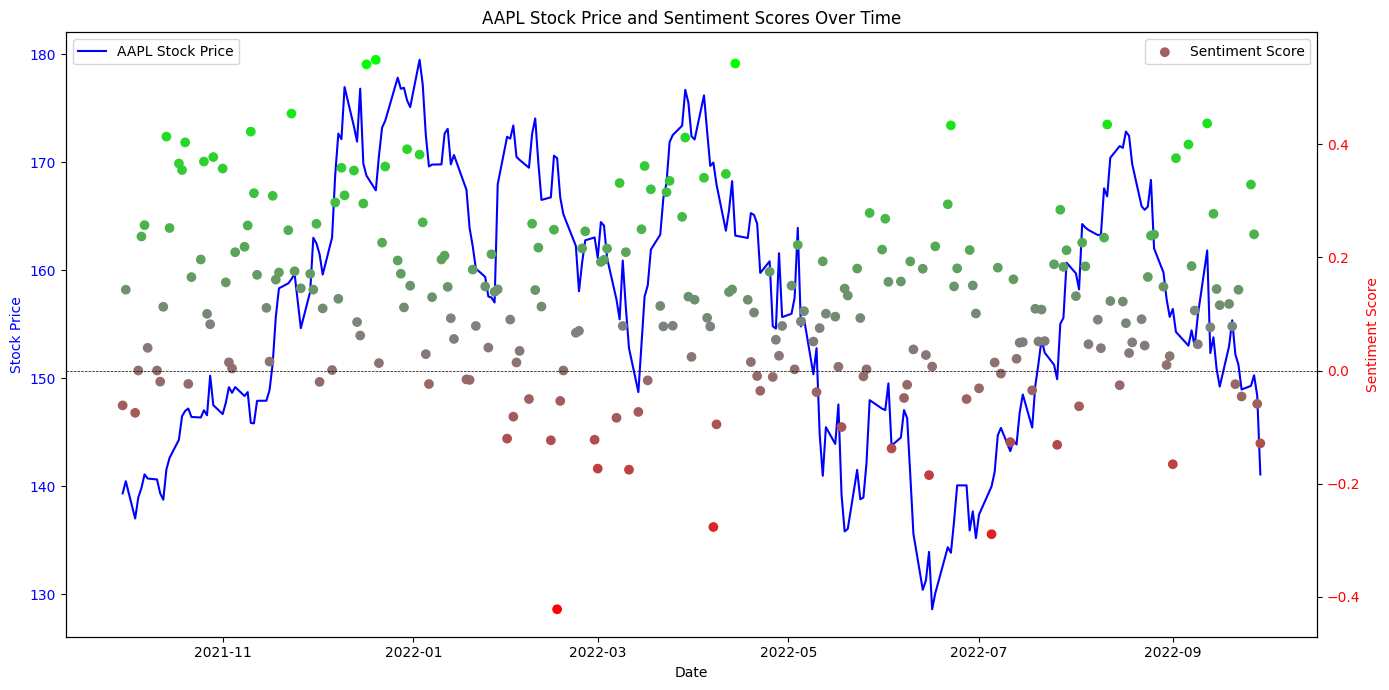

In [68]:
#%pip install seaborn
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

df_apple['Date'] = pd.to_datetime(df_apple['Date']).dt.normalize()
aapl_stock['Date'] = pd.to_datetime(aapl_stock['Date']).dt.normalize()

# Check date ranges of both dataframes
print("aapl_stock Date Range:", aapl_stock['Date'].min(), "to", aapl_stock['Date'].max())
print("df_apple Date Range:", df_apple['Date'].min(), "to", df_apple['Date'].max())

# Filter df_apple to only include dates within the aapl_stock date range
df_apple_filtered = df_apple[(df_apple['Date'] >= aapl_stock['Date'].min()) & (df_apple['Date'] <= aapl_stock['Date'].max())]

# Aggregate sentiment scores by taking the mean for each date
df_apple_agg = df_apple_filtered.groupby('Date').agg({'score': 'mean'}).reset_index()

# Merge the aggregated df_apple with aapl_stock on Date
df_merged = pd.merge(aapl_stock, df_apple_agg, on='Date', how='inner')

# Check number of rows in the merged dataframe
print("Number of rows in df_merged:", len(df_merged))

# Define a custom color map
colors = [(1, 0, 0), (0.5, 0.5, 0.5), (0, 1, 0)]  # R -> Gray -> G
n_bins = 100  # Discretize the color map into 100 bins
cmap_name = 'sentiment_cmap'
sentiment_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalize the sentiment scores to [0, 1] for color mapping
norm = plt.Normalize(df_merged['score'].min(), df_merged['score'].max())
sm = plt.cm.ScalarMappable(cmap=sentiment_cmap, norm=norm)
df_merged['color'] = df_merged['score'].apply(lambda x: sm.to_rgba(x))

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot stock prices (e.g., Adj Close) on the primary y-axis
sns.lineplot(x='Date', y='Adj Close', data=df_merged, ax=ax1, color='blue', label='AAPL Stock Price')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot sentiment scores on the secondary y-axis
ax2 = ax1.twinx()
ax2.scatter(df_merged['Date'], df_merged['score'], color=df_merged['color'], label='Sentiment Score')
ax2.axhline(y=0.0, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at sentiment score 0.0
ax2.set_ylabel('Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title('AAPL Stock Price and Sentiment Scores Over Time')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [88]:
# NOTE: This code is only to process both Apple's and Tesla's stock.
# This code takes longer to do. I (Kian) will work with both stocks in the near future. For now, it's just Apple.

df_apple = df_tweets[df_tweets["Stock Name"] == "AAPL"]

# Filter for Tesla tweets and sample 5056 tweets
df_tesla = df_tweets[df_tweets["Stock Name"] == "TSLA"].sample(n=5056, random_state=1)

# Concatenate the Apple and sampled Tesla tweets
df_apple_tesla = pd.concat([df_apple, df_tesla]).reset_index(drop=True)

# Display the resulting DataFrame
print(df_apple_tesla)

                            Date  \
0      2022-09-29 22:23:54+00:00   
1      2022-09-29 20:37:01+00:00   
2      2022-09-29 20:19:43+00:00   
3      2022-09-29 20:13:48+00:00   
4      2022-09-29 19:50:00+00:00   
...                          ...   
10107  2022-08-24 19:16:24+00:00   
10108  2022-01-28 20:19:22+00:00   
10109  2022-06-28 16:14:08+00:00   
10110  2022-06-16 10:20:57+00:00   
10111  2022-04-20 14:48:25+00:00   

                                                   Tweet Stock Name  \
0      $NIO just because I'm down money doesn't mean ...       AAPL   
1      After trading for 9+ years \n\nThis is how to ...       AAPL   
2      Not something you see very often.  \n-2 ATR mo...       AAPL   
3      $AAPL was down almost 5% today. Rare to see it...       AAPL   
4      $AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...       AAPL   
...                                                  ...        ...   
10107  thankful af it's a public company and to be al...       TSLA   

In [100]:
results_tesla = [(tweet, sentiment_pipeline(tweet)) for tweet in df_tesla["Tweet"]]
results_tesla[:5]

# ~ 15 mins

[('@AukeHoekstra @BrianGitt @Tesla @VW @TUeindhoven Insane that people still try to get away with that "battery needs replacement" shit\n\nThere are 10s of millions of EVs on the road, it\'s not a matter of calculations and theory, they literally don\'t need replacements in practice',
  [{'label': 'negative', 'score': 0.705970823764801}]),
 ('@AnandWrites Glad I don’t work for @Tesla - imagine the toxic approach towards diversity and inclusion they must have..',
  [{'label': 'negative', 'score': 0.8834050893783569}]),
 ('Don’t be scared. Don’t panic. \n\nThese are the times to scoop up the best companies on the low. \n\nNibble nibble nibble. \n\nLittle by little, the tide will turn in our favor.\n\nOnce inflation metrics cool off, that’s when we’ll moon.\n\nUntil then, I’m loading the booster.\n\n$TSLA',
  [{'label': 'positive', 'score': 0.7431896924972534}]),
 ('Good number out of China last night. However, I think the markets expected it to be good. $TSLA',
  [{'label': 'positive', '

In [101]:
final_scores = []
for result in results_tesla:
    sentiment = result[1][0]
    label = sentiment["label"]
    score = sentiment["score"]

    # LABEL_0: Negative
    # LABEL_1: Neutral
    # LABEL_2: Positive
    if label == "positive":
        final_scores.append(score)
    elif label == "negative":
        final_scores.append(-1*score)
    else:
        final_scores.append(0)
df_tesla.loc[:,"score"] = final_scores
df_tesla

# Score of 1: Very positive about Apple
# Score of 0: Very neutral about Apple
# Score of -1: Very negative about Apple

,Date,Tweet,Stock Name,Company Name,score
11766,2022-05-15,@AukeHoekstra @BrianGitt @Tesla @VW @TUeindhov...,TSLA,"Tesla, Inc.",-0.705971
18861,2022-03-14,@AnandWrites Glad I don’t work for @Tesla - im...,TSLA,"Tesla, Inc.",-0.883405
69,2022-09-29,Don’t be scared. Don’t panic. \n\nThese are th...,TSLA,"Tesla, Inc.",0.743190
36275,2021-10-12,"Good number out of China last night. However, ...",TSLA,"Tesla, Inc.",0.907607
27475,2021-12-22,There is no “next Tesla”\n\nThere is only one ...,TSLA,"Tesla, Inc.",0.000000
...,...,...,...,...,...
2731,2022-08-24,thankful af it's a public company and to be al...,TSLA,"Tesla, Inc.",0.980714
22537,2022-01-28,I'm not a big fan of everyone telling @elonmus...,TSLA,"Tesla, Inc.",-0.749684
7759,2022-06-28,Volkswagen’s presentation about its EV divisio...,TSLA,"Tesla, Inc.",0.000000
8507,2022-06-16,Tesla has the ability to raise price at will f...,TSLA,"Tesla, Inc.",0.000000


In [99]:
df_tesla

,Date,Tweet,Stock Name,Company Name
11766,2022-05-15,@AukeHoekstra @BrianGitt @Tesla @VW @TUeindhov...,TSLA,"Tesla, Inc."
18861,2022-03-14,@AnandWrites Glad I don’t work for @Tesla - im...,TSLA,"Tesla, Inc."
69,2022-09-29,Don’t be scared. Don’t panic. \n\nThese are th...,TSLA,"Tesla, Inc."
36275,2021-10-12,"Good number out of China last night. However, ...",TSLA,"Tesla, Inc."
27475,2021-12-22,There is no “next Tesla”\n\nThere is only one ...,TSLA,"Tesla, Inc."
...,...,...,...,...
2731,2022-08-24,thankful af it's a public company and to be al...,TSLA,"Tesla, Inc."
22537,2022-01-28,I'm not a big fan of everyone telling @elonmus...,TSLA,"Tesla, Inc."
7759,2022-06-28,Volkswagen’s presentation about its EV divisio...,TSLA,"Tesla, Inc."
8507,2022-06-16,Tesla has the ability to raise price at will f...,TSLA,"Tesla, Inc."


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


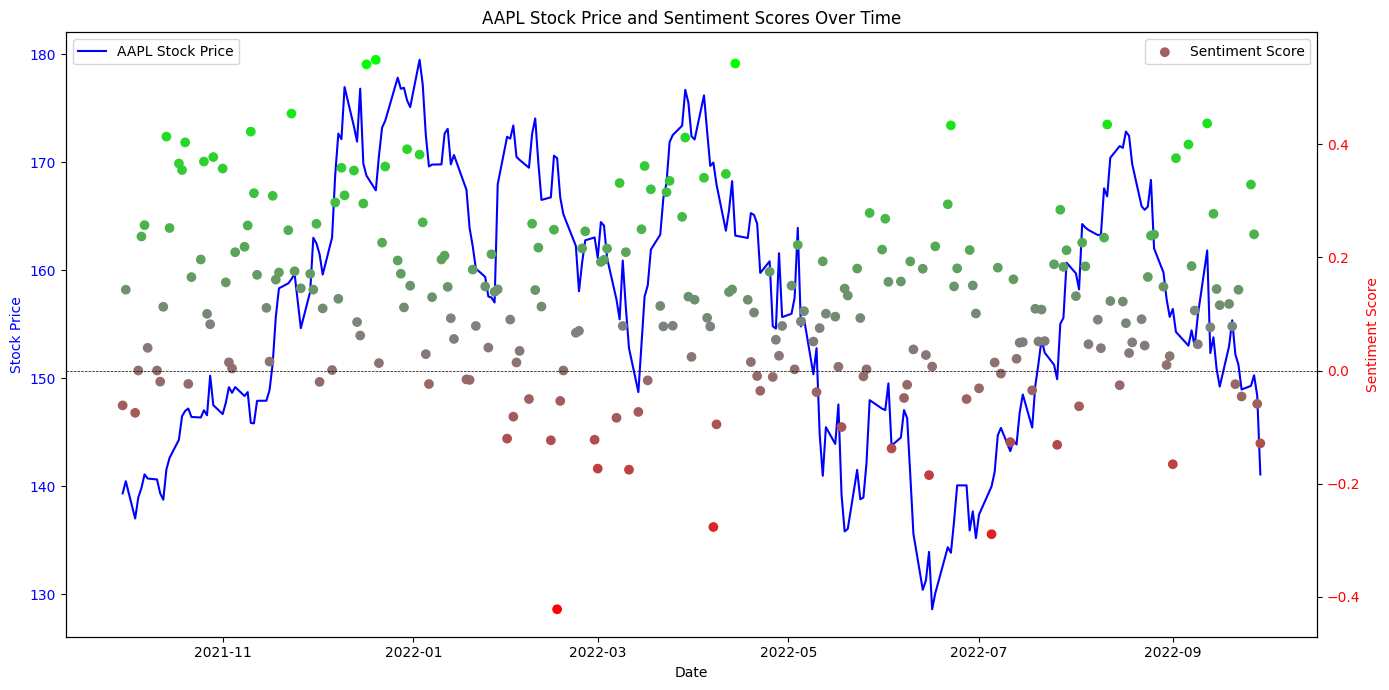

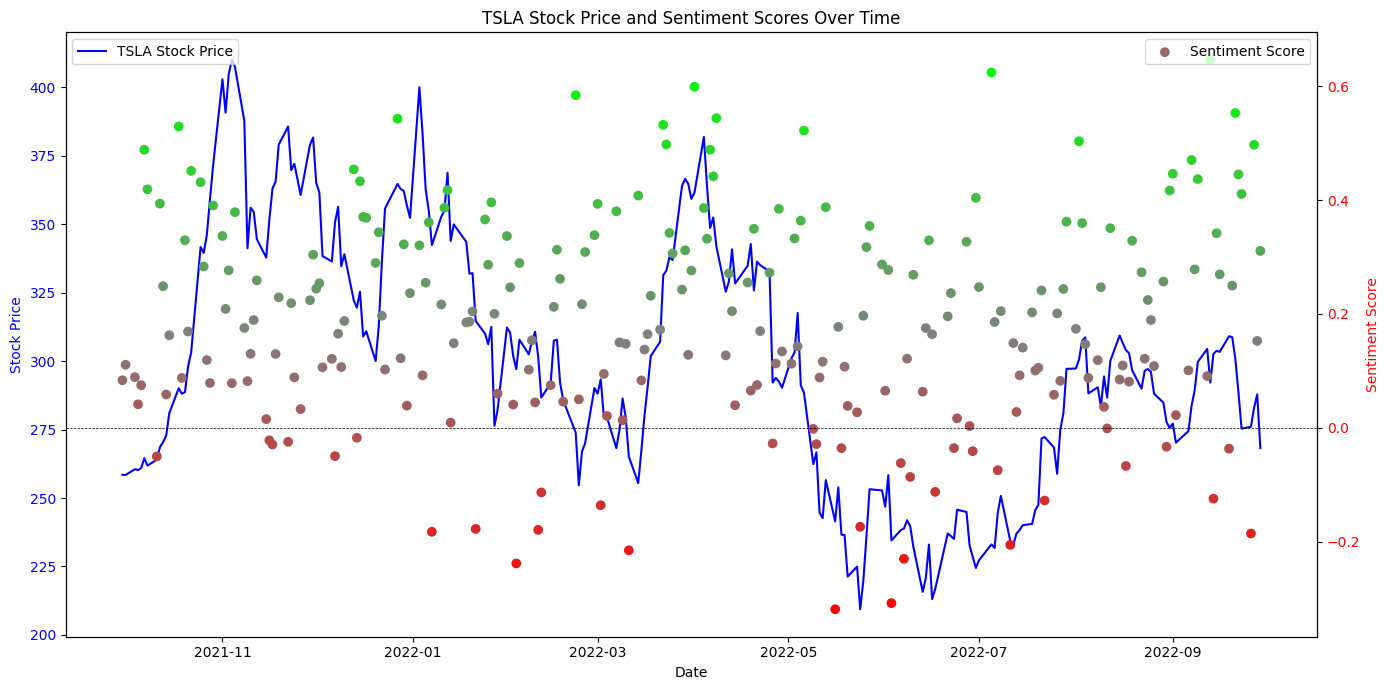

In [102]:
tickers = ['AAPL', 'TSLA']
stock_data = get(tickers, datetime.datetime(2018, 10, 1), datetime.datetime(2024, 1, 1))
stock_data = stock_data.reset_index(level='Ticker').reset_index()

df_apple['Date'] = pd.to_datetime(df_apple['Date']).dt.normalize().dt.tz_localize(None)
df_tesla['Date'] = pd.to_datetime(df_tesla['Date']).dt.normalize().dt.tz_localize(None)
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.normalize().dt.tz_localize(None)

# Function to plot sentiment scores and stock prices
def plot_sentiment_stock(df_sentiment, stock_ticker):
    # Filter stock data for the specific ticker
    stock_df = stock_data[stock_data['Ticker'] == stock_ticker]

    # Filter df_sentiment to only include dates within the stock_df date range
    df_sentiment_filtered = df_sentiment[(df_sentiment['Date'] >= stock_df['Date'].min()) & (df_sentiment['Date'] <= stock_df['Date'].max())]

    # Aggregate sentiment scores by taking the mean for each date
    df_sentiment_agg = df_sentiment_filtered.groupby('Date').agg({'score': 'mean'}).reset_index()

    # Merge the aggregated sentiment data with stock data on Date
    df_merged = pd.merge(stock_df, df_sentiment_agg, on='Date', how='inner')
    

    # Define a custom color map
    colors = [(1, 0, 0), (0.5, 0.5, 0.5), (0, 1, 0)]  # R -> Gray -> G
    n_bins = 100  # Discretize the color map into 100 bins
    cmap_name = 'sentiment_cmap'
    sentiment_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Normalize the sentiment scores to [0, 1] for color mapping
    norm = plt.Normalize(df_merged['score'].min(), df_merged['score'].max())
    sm = plt.cm.ScalarMappable(cmap=sentiment_cmap, norm=norm)
    df_merged['color'] = df_merged['score'].apply(lambda x: sm.to_rgba(x))

    # Plotting
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot stock prices (e.g., Adj Close) on the primary y-axis
    sns.lineplot(x='Date', y='Adj Close', data=df_merged, ax=ax1, color='blue', label=f'{stock_ticker} Stock Price')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plot sentiment scores on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.scatter(df_merged['Date'], df_merged['score'], color=df_merged['color'], label='Sentiment Score')
    ax2.axhline(y=0.0, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at sentiment score 0.0
    ax2.set_ylabel('Sentiment Score', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Title and legends
    plt.title(f'{stock_ticker} Stock Price and Sentiment Scores Over Time')
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

# Plot for Apple
plot_sentiment_stock(df_apple, 'AAPL')

# Plot for Tesla
plot_sentiment_stock(df_tesla, 'TSLA')

# NEWS ANALYSIS

In [6]:
#%pip install yahoo_fin
#%pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from yahoo_fin import news
from dateutil import parser
import datetime
import pytz

# Define the ticker symbol for the stock of interest
ticker = "AAPL"  # Apple Inc.

# Fetch news articles related to the specified stock
news_articles = news.get_yf_rss(ticker)

# Define the date range and make them timezone-aware (UTC)
start_date = datetime.datetime(2024, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2024, 12, 31, tzinfo=pytz.UTC)

# Filter articles by date
filtered_articles = []
for article in news_articles:
    pub_date_str = article.get('published', article.get('pubDate', 'N/A'))
    print("Raw publication date string:", pub_date_str)
    
    try:
        pub_date = parser.parse(pub_date_str)
        print("Parsed publication date:", pub_date)
        
        if start_date <= pub_date <= end_date:
            filtered_articles.append(article)
            print("Article within date range:", article['title'])
        else:
            print("Article outside date range")
    except (ValueError, TypeError) as e:
        # Handle parsing errors or missing dates
        print("Error parsing date:", e)
        pass

# Display the filtered news articles
for article in filtered_articles:
    print("Title:", article.get('title', 'N/A'))
    print("Link:", article.get('link', 'N/A'))
    print("Date:", article.get('published', article.get('pubDate', 'N/A')))
    print("Description:", article.get('summary', article.get('description', 'N/A')))
    print("\n")

print(f"Total articles between {start_date.date()} and {end_date.date()}: {len(filtered_articles)}")


Raw publication date string: Mon, 15 Jul 2024 03:17:00 +0000
Parsed publication date: 2024-07-15 03:17:00+00:00
Article within date range: Apple, Samsung Phone Shipments Rose in Second Quarter
Raw publication date string: Mon, 15 Jul 2024 02:30:16 +0000
Parsed publication date: 2024-07-15 02:30:16+00:00
Article within date range: Smartphone Market Grows 6% as AI and Discounts Help Demand
Raw publication date string: Sun, 14 Jul 2024 22:00:00 +0000
Parsed publication date: 2024-07-14 22:00:00+00:00
Article within date range: Prediction: 3 Stocks That Will Be Worth More Than Apple 3 Years From Now
Raw publication date string: Sun, 14 Jul 2024 21:42:49 +0000
Parsed publication date: 2024-07-14 21:42:49+00:00
Article within date range: Is Apple Inc (NASDAQ:AAPL) Aswath Damodaran’s Best AI Stock Pick?
Raw publication date string: Sun, 14 Jul 2024 11:00:00 +0000
Parsed publication date: 2024-07-14 11:00:00+00:00
Article within date range: Future-Proof Your Portfolio: 3 Low-Cost AI Stocks to 

## MODEL 1: Roberta

In [77]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from yahoo_fin import news
from dateutil import parser

# Function to perform sentiment analysis on news articles for a given ticker
def analyze_sentiment_for_ticker(ticker):
    # Fetch news articles related to the specified stock
    # Fetch news articles related to the specified stock
    news_articles = news.get_yf_rss(ticker)

    # Filter articles to ensure the title contains the stock ticker name or company name
    filtered_articles = [
        article for article in news_articles
        if ticker in article.get('title', '') or company_name in article.get('title', '')
    ]

    # Ensure articles are sorted by publication date and get the latest 4 articles
    sorted_articles = sorted(filtered_articles, key=lambda x: parser.parse(x.get('published', x.get('pubDate', ''))), reverse=True)
    latest_articles = sorted_articles[:4]

    
    # Load the sentiment analysis model and tokenizer
    model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    
    # Create a sentiment analysis pipeline using the loaded model and tokenizer
    sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
    
    # Perform sentiment analysis on the latest 4 articles
    for article in latest_articles:
        title = article.get('title', 'N/A')
        description = article.get('summary', article.get('description', 'N/A'))
        pub_date = article.get('published', article.get('pubDate', 'N/A'))
        
        # Combine title and description for sentiment analysis
        text = f"{title}. {description}"
        
        
        
        # Get sentiment
        sentiment = sentiment_analysis(text[:512])[0]  # limit to 512 tokens for the model
        
        # Display the article information and sentiment
        print(f"Ticker: {ticker}")
        print(f"Title: {title}")
        print(f"Link: {article.get('link', 'N/A')}")
        print(f"Date: {pub_date}")
        print(f"Description: {description}")
        print(f"Sentiment: {sentiment['label']} with score {sentiment['score']:.2f}")
        
        # Determine sentiment intensity
        if sentiment['score'] > 0.15:
            if sentiment['score'] > 0.5:
                if sentiment['score'] > 0.75:
                    print("+++")
                else:
                    print("++")
            else:
                print("+")
        elif sentiment['score'] < -0.15:
            if sentiment['score'] < -0.5:
                if sentiment['score'] < -0.75:
                    print("---")
                else:
                    print("--")
            else:
                print("-")
        else:
            print("~")
        
        print("\n")

# List of tickers to analyze
tickers = ["AAPL", "TSLA"]

# Analyze sentiment for each ticker in the list
for ticker in tickers:
    print(f"Analyzing sentiment for {ticker}...\n")
    analyze_sentiment_for_ticker(ticker)
    
# +++: Very positive, ++: Positive, +: Merely positive, ~: Neutral, -: Merely negative, --: Negative, ---: Very negative

Analyzing sentiment for AAPL...



Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Ticker: AAPL
Title: At last, Apple's Messages app will support RCS and scheduling texts
Link: https://techcrunch.com/2024/07/15/at-last-apples-messages-app-will-support-rcs-and-scheduling-texts/?.tsrc=rss
Date: Tue, 16 Jul 2024 04:17:09 +0000
Description: The biggest updates coming to Apple's iMessage and its Messages app in iOS 18 aren't its AI emoji, Genmoji, or even the ability to send texts via satellite. It's the ability to finally, finally schedule messages to send at a later date and time, as well as support for RCS, the next-gen messaging standard and replacement for SMS that will make texting with Android folks much less painful. These updates are now available in iOS 18's public beta, which just opened up this week. Though buried amid a
Sentiment: positive with score 0.88
+++


Ticker: AAPL
Title: Apple (AAPL) Beats Stock Market Upswing: What Investors Need to Know
Link: https://finance.yahoo.com/news/apple-aapl-beats-stock-market-214517805.html?.tsrc=rss
Date: Mon, 15 Jul 20

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Ticker: TSLA
Title: Tesla (TSLA) Surpasses Market Returns: Some Facts Worth Knowing
Link: https://finance.yahoo.com/news/tesla-tsla-surpasses-market-returns-214521107.html?.tsrc=rss
Date: Mon, 15 Jul 2024 21:45:21 +0000
Description: Tesla (TSLA) concluded the recent trading session at $252.64, signifying a +1.78% move from its prior day's close.
Sentiment: positive with score 0.89
+++


Ticker: TSLA
Title: These Stocks Are Moving the Most Today: Trump Media, Tesla, Goldman Sachs, Apple, SolarEdge, First Solar, Macy’s, and More
Link: https://finance.yahoo.com/m/32539c94-02a1-3baa-a8f5-fef655c56aa3/these-stocks-are-moving-the.html?.tsrc=rss
Date: Mon, 15 Jul 2024 18:25:00 +0000
Description: Trump Media stock surges following an assassination attempt on former President Donald Trump, Tesla jumps after CEO Elon Musk endorses Trump for president, and Goldman Sachs tops earnings expectations.
Sentiment: neutral with score 0.56
++


Ticker: TSLA
Title: Dow Jones Rises 275 Points After Trump A

## MODEL 2: VADER

In [31]:
%pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 126.0/126.0 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [61]:
from yahoo_fin import news
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from dateutil import parser

ticker = "AAPL"  # Apple Inc.
company_name = "Apple"  # Company name

# Fetch news articles related to the specified stock
news_articles = news.get_yf_rss(ticker)

# Filter articles to ensure the title contains the stock ticker name or company name
filtered_articles = [
    article for article in news_articles
    if ticker in article.get('title', '') or company_name in article.get('title', '')
]

# Ensure articles are sorted by publication date and get the latest 4 articles
sorted_articles = sorted(filtered_articles, key=lambda x: parser.parse(x.get('published', x.get('pubDate', ''))), reverse=True)
latest_articles = sorted_articles[:4]

# VADER
analyzer = SentimentIntensityAnalyzer()

# Sentiment analysis on the latest 4 articles
for article in latest_articles:
    title = article.get('title', 'N/A')
    description = article.get('summary', article.get('description', 'N/A'))
    pub_date = article.get('published', article.get('pubDate', 'N/A'))
    
    # Combine title and description for sentiment analysis
    text = f"{title}. {description}"
    
    # Get sentiment
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    # Determine sentiment label based on compound score
    if compound_score >= 0.05:
        sentiment_label = 'Positive'
    elif compound_score <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    # Display the article information and sentiment
    print(f"Article header: {title}")
    print(f"Link: {article.get('link', 'N/A')}")
    print(f"Date: {pub_date}")
    print(f"Description: {description}")
    print(f"Sentiment: {sentiment_label} with compound score {compound_score}")
    
    # Determine sentiment intensity
    if compound_score > 0.15:
        if compound_score > 0.5:
            if compound_score > 0.75:
                print("+++")
            else:
                print("++")
        else:
            print("+")
    elif compound_score < -0.15:
        if compound_score < -0.5:
            if compound_score < -0.75:
                print("---")
            else:
                print("--")
        else:
            print("-")
    else:
        print("~")
    
    print("\n")


Article header: Apple (AAPL) Beats Stock Market Upswing: What Investors Need to Know
Link: https://finance.yahoo.com/news/apple-aapl-beats-stock-market-214517805.html?.tsrc=rss
Date: Mon, 15 Jul 2024 21:45:17 +0000
Description: Apple (AAPL) reachead $234.41 at the closing of the latest trading day, reflecting a +1.68% change compared to its last close.
Sentiment: Neutral with compound score 0.0
~


Article header: Apple's public betas for iOS 18 are here to test out
Link: https://techcrunch.com/2024/07/15/apples-public-betas-for-ios-18-are-here-to-test-out/?.tsrc=rss
Date: Mon, 15 Jul 2024 21:29:51 +0000
Description: Apple released the public betas for its next generation of software on the iPhone, Mac, iPad, and Apple Watch on Monday. You can now test out iOS 18 and many of its new features, except for Apple Intelligence which is coming to beta this fall, and provide feedback to Apple. Anyone interested in trying out Apple's upcoming software upgrades can sign up for the Apple Beta So

## MODEL 3: Distilbert

In [46]:
%pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.7 MB 5.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.7 MB 8.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.7 MB 9.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.7 MB 9.7 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.7 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 4.9 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 5.3 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 5.3 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
from transformers import pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from yahoo_fin import news
from dateutil import parser

stocks = [
    {"ticker": "AAPL", "company_name": "Apple", "industry": "Tech"},
    {"ticker": "TSLA", "company_name": "Tesla", "industry": "Tech"},
]

# Load sentiment analysis model & tokenizer
model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Pipeline:
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

# Function to fetch and analyze news articles for a given stock
def analyze_stock_news(ticker, company_name, industry):
    news_articles = news.get_yf_rss(ticker)

    filtered_articles = [
        article for article in news_articles
        if ticker in article.get('title', '') or company_name in article.get('title', '') or industry in article.get('title', '')
    ]

    sorted_articles = sorted(filtered_articles, key=lambda x: parser.parse(x['published'] if 'published' in x else x['pubDate']), reverse=True)
    latest_articles = sorted_articles[:4]

    for article in latest_articles:
        title = article.get('title', 'N/A')
        description = article.get('summary', article.get('description', 'N/A'))
        pub_date = article.get('published', article.get('pubDate', 'N/A'))

        text = f"{title}. {description}"

        prediction = classifier(text[:512])[0]  # limit to 512 tokens for the model

        print(f"Ticker: {ticker}")
        print(f"Article header: {title}")
        print(f"Link: {article.get('link', 'N/A')}")
        print(f"Date: {pub_date}")
        print(f"Description: {description}")
        for entry in prediction:
            label = entry['label']
            score = entry['score']

            if label in ['joy', 'anger', 'fear', 'surprise']:
                print(f"{label}: {score}")
        print("\n")

# Analyze news for each stock in the list
for stock in stocks:
    analyze_stock_news(stock["ticker"], stock["company_name"], stock["industry"])


Ticker: AAPL
Article header: At last, Apple's Messages app will support RCS and scheduling texts
Link: https://techcrunch.com/2024/07/15/at-last-apples-messages-app-will-support-rcs-and-scheduling-texts/?.tsrc=rss
Date: Tue, 16 Jul 2024 04:17:09 +0000
Description: The biggest updates coming to Apple's iMessage and its Messages app in iOS 18 aren't its AI emoji, Genmoji, or even the ability to send texts via satellite. It's the ability to finally, finally schedule messages to send at a later date and time, as well as support for RCS, the next-gen messaging standard and replacement for SMS that will make texting with Android folks much less painful. These updates are now available in iOS 18's public beta, which just opened up this week. Though buried amid a
joy: 0.0013485652161762118
anger: 0.0020250154193490744
fear: 0.0007155491621233523
surprise: 0.00018101686146110296


Ticker: AAPL
Article header: Apple (AAPL) Beats Stock Market Upswing: What Investors Need to Know
Link: https://fin

In [ ]:
# IDEA TO SELF: Do the text sentiment analysis for Tweets like before, but use this model too and incorporate the scores:
#  - joy
#  - anger
#  - fear
#  - surprise
# These are strong, expressive emotions that may create urgency to encourage buying a stock, for example, an exaggerated
# article which stirs up surprise and fear about a stock, will drive a sense of rapidly panick-buying or panick-selling the 
# stock.

#joy:      20%
#anger:    20%
#fear:     20%
#surprise: 40%  # if > 0.007, give extra weight for manipulation

# Use RobustScaler to highlight outliers